In [1]:
!ln -s ../hlm ./

ln: failed to create symbolic link './hlm': File exists


In [1]:
#seaborn is required for the traceplots
import pysal as ps
import hlm
from hlm.verify import Delta_members
from hlm.plotting.traces import plot_trace
import numpy as np
import seaborn as sns
sns.set_palette('Set1', desat=.8)
import matplotlib.pyplot as plt
import multiprocessing as mp
%matplotlib inline

df = ps.pdio.read_files(ps.examples.get_path('south.shp'))
df = df[df.STATE_NAME != 'District of Columbia']
X = df[['GI89', 'BLK90', 'HR90']].values
N = X.shape[0]
Z = df.groupby('STATE_NAME')['FH90'].mean()
Z = Z.values.reshape(-1,1)
J = Z.shape[0]

Y = df.DNL90.values.reshape(-1,1)
W2 = ps.queen_from_shapefile(ps.examples.get_path('us48.shp'), 
                             idVariable='STATE_NAME')
W2 = ps.w_subset(W2, ids=df.STATE_NAME.unique().tolist())
W1 = ps.queen_from_shapefile(ps.examples.get_path('south.shp'),
                             idVariable='FIPS')
W1 = ps.w_subset(W1, ids=df.FIPS.tolist())

W1.transform = 'r'
W2.transform = 'r'
membership = df.STATE_NAME.apply(lambda x: W2.id_order.index(x)).values
Delta, membership = Delta_members(None, membership, W1.n, W2.n)

In [2]:
WZ = ps.lag_spatial(W2, Z)
ZDurbin = np.hstack((Z, WZ))

In [3]:
a = hlm.upper.SE(Y,X,M=W2, Z=ZDurbin, membership=membership, n_samples=0, 
                  tuning=1000)

In [4]:
a.sample(1000,n_jobs=3)

In [5]:
a.sample(20000)

/home/ljw/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


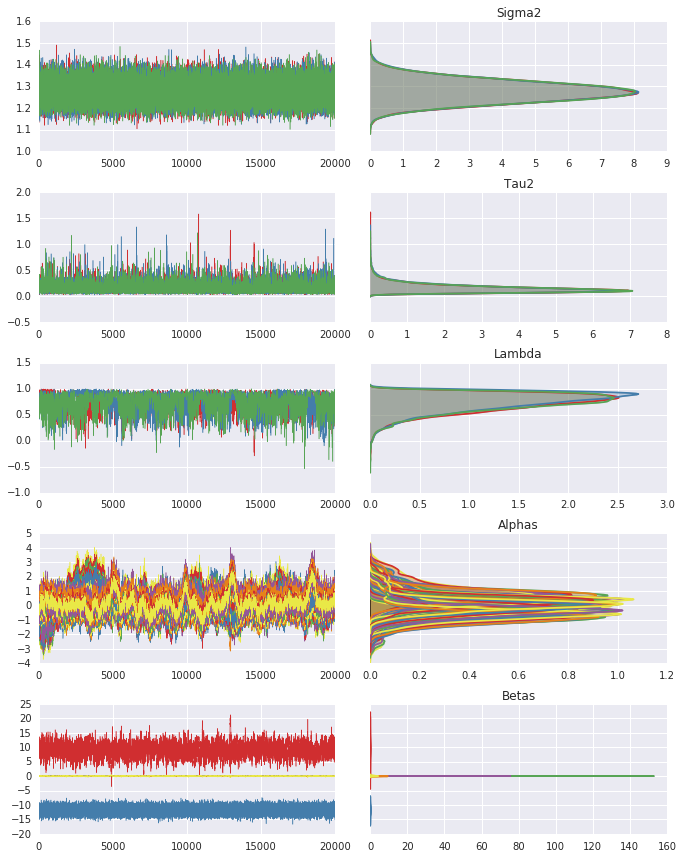

In [6]:
a.trace.plot(burn=1000)
plt.tight_layout()
plt.show()

In [7]:
a.trace.to_csv('test.csv')

In [71]:
import hlm.diagnostics as d
import imp
imp.reload(d)

<module 'hlm.diagnostics' from '/home/ljw/Downloads/projects/hlm_gibbs/notebooks/hlm/diagnostics.py'>

In [74]:
a.trace.to_csv('./hlm/tests/data/south_mvcm_5000.csv')

In [72]:
d.psrf(a)

{'Alphas': [1.0074186737402251,
  1.004616379433712,
  1.0068883674717661,
  1.0083778274958104,
  1.0088766431053604,
  1.0089584434957952,
  1.0074524658990298,
  1.0051380521574189,
  1.0072733056326924,
  1.008008805180221,
  1.0034597166146957,
  1.0067601443062637,
  1.008711971020664,
  1.0058004207797147,
  1.008742984796394,
  1.0068494696589718],
 'Betas': [1.0005917712688539,
  1.0000043922619331,
  1.0000088881732401,
  0.99997785228939939,
  1.0004727232307757,
  1.0022545058905359],
 'Lambda': 0.99996720389080085,
 'Sigma2': 0.99995546682369807,
 'Tau2': 1.0009699179584863}

In [73]:
d._brooks_gelman_rubin(a.trace['Alphas', -a.cycles//2:])

[1.0074186737402251,
 1.004616379433712,
 1.0068883674717661,
 1.0083778274958104,
 1.0088766431053604,
 1.0089584434957952,
 1.0074524658990298,
 1.0051380521574189,
 1.0072733056326924,
 1.008008805180221,
 1.0034597166146957,
 1.0067601443062637,
 1.008711971020664,
 1.0058004207797147,
 1.008742984796394,
 1.0068494696589718]

In [30]:
d._brooks_gelman_rubin(a.trace['Alphas', -a.cycles//2:])

[1.0074186737402251,
 1.004616379433712,
 1.0068883674717661,
 1.0083778274958104,
 1.0088766431053604,
 1.0089584434957952,
 1.0074524658990298,
 1.0051380521574189,
 1.0072733056326924,
 1.008008805180221,
 1.0034597166146957,
 1.0067601443062637,
 1.008711971020664,
 1.0058004207797147,
 1.008742984796394,
 1.0068494696589718]

In [36]:
d.psrf(trace=a.trace)

{'Alphas': 0.99998718108613593,
 'Betas': 0.99998718108613593,
 'Lambda': 0.99998718108613593,
 'Sigma2': 0.99998718108613593,
 'Tau2': 0.99998718108613593}

In [37]:
d._brooks_gelman_rubin(a.trace['Alphas', -a.cycles//2:])

[1.0074186737402251,
 1.004616379433712,
 1.0068883674717661,
 1.0083778274958104,
 1.0088766431053604,
 1.0089584434957952,
 1.0074524658990298,
 1.0051380521574189,
 1.0072733056326924,
 1.008008805180221,
 1.0034597166146957,
 1.0067601443062637,
 1.008711971020664,
 1.0058004207797147,
 1.008742984796394,
 1.0068494696589718]

In [ ]:
a.trace.chains